In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.explainability_tools import PartialDependenceDisplay, PDFeatureImportanceDisplay
from smt.explainability_tools import partial_dependence, pd_feature_importance
from smt.explainability_tools import pd_pairwise_interaction, pd_overall_interaction, PDFeatureInteractionDisplay
from smt.explainability_tools import ShapDisplay

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [3]:
california_housing["data"].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
len(california_housing["data"])

20640

In [5]:
X = np.array(california_housing["data"])
y = np.array(california_housing["target"])

n_data = 1000
idx = np.random.choice(len(X), n_data, replace=False)

X = X[idx]
y = y[idx]

n_train = int(0.8*n_data)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

scaler = StandardScaler().fit(X_tr)
# X_tr = scaler.transform(X_tr)
# X_te = scaler.transform(X_te)

kriging_model = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
kriging_model.set_training_values(
    X_tr, 
    y_tr
    )

kriging_model.train()
y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 800
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 32.6749470
RMSE: 0.8237
rRMSE: 0.3599


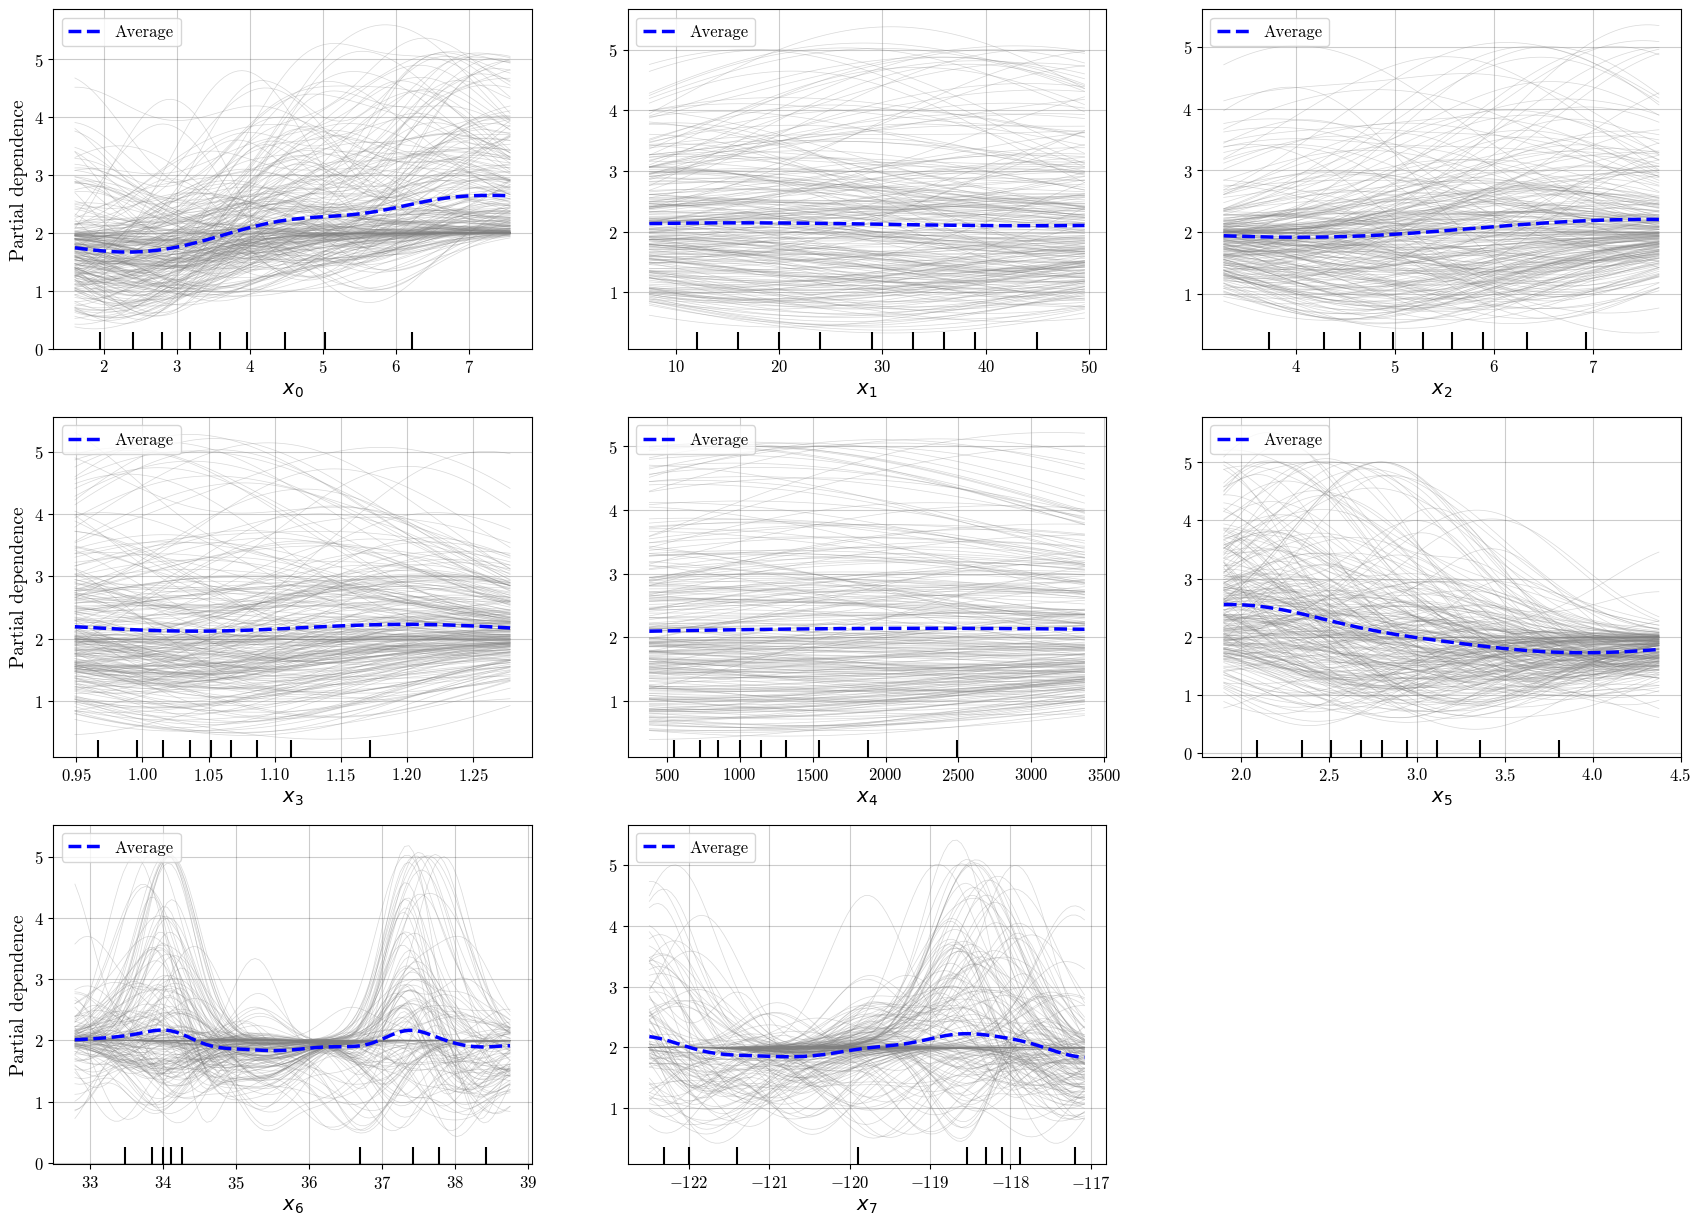

In [6]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, ]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    centered=False,
)

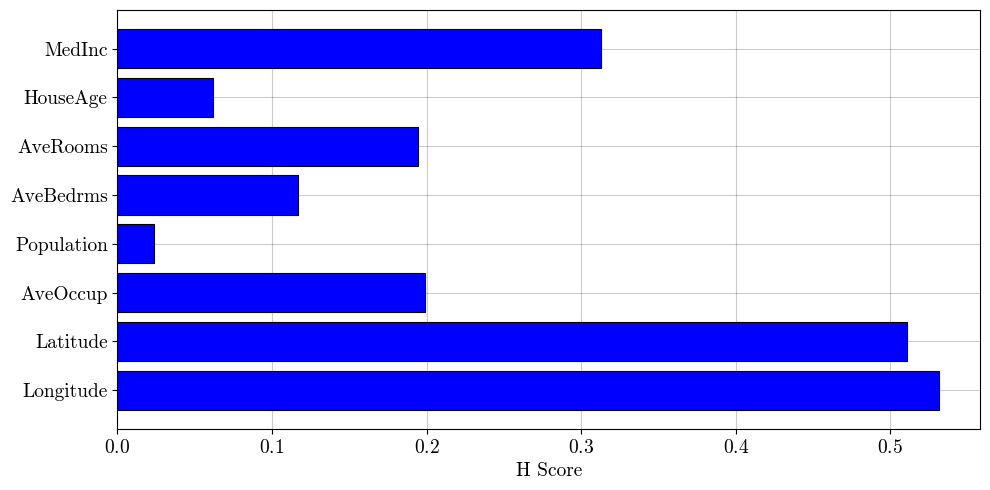

In [7]:
model = kriging_model
feature_names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude", 
    "Longitude",
]

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X_tr,
    feature_names=feature_names,
    figsize=[10, 5],
    vert=True,
)

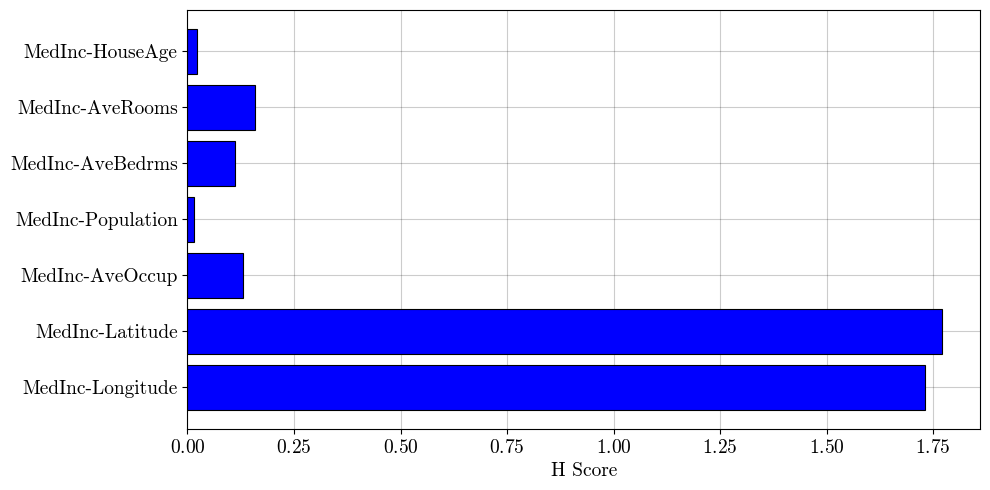

In [10]:
model = kriging_model
feature_names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude", 
    "Longitude",
]
features = [0, 1, 2, 3, 4, 5, 6, 7,]
feature_i = 0
feature_pairs = [
    (feature_i, feature_j) for feature_j in features if feature_j != feature_i
]


overall_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X_tr,
    feature_pairs,
    feature_names=feature_names,
    figsize=[10, 5], 
    vert=True,
    ratio_samples=0.25,
)

In [11]:
instances = X_tr
model = kriging_model
feature_names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude", 
    "Longitude",
]
display = ShapDisplay.from_surrogate_model(
    instances, 
    model, 
    X_tr, 
    feature_names=feature_names,
)

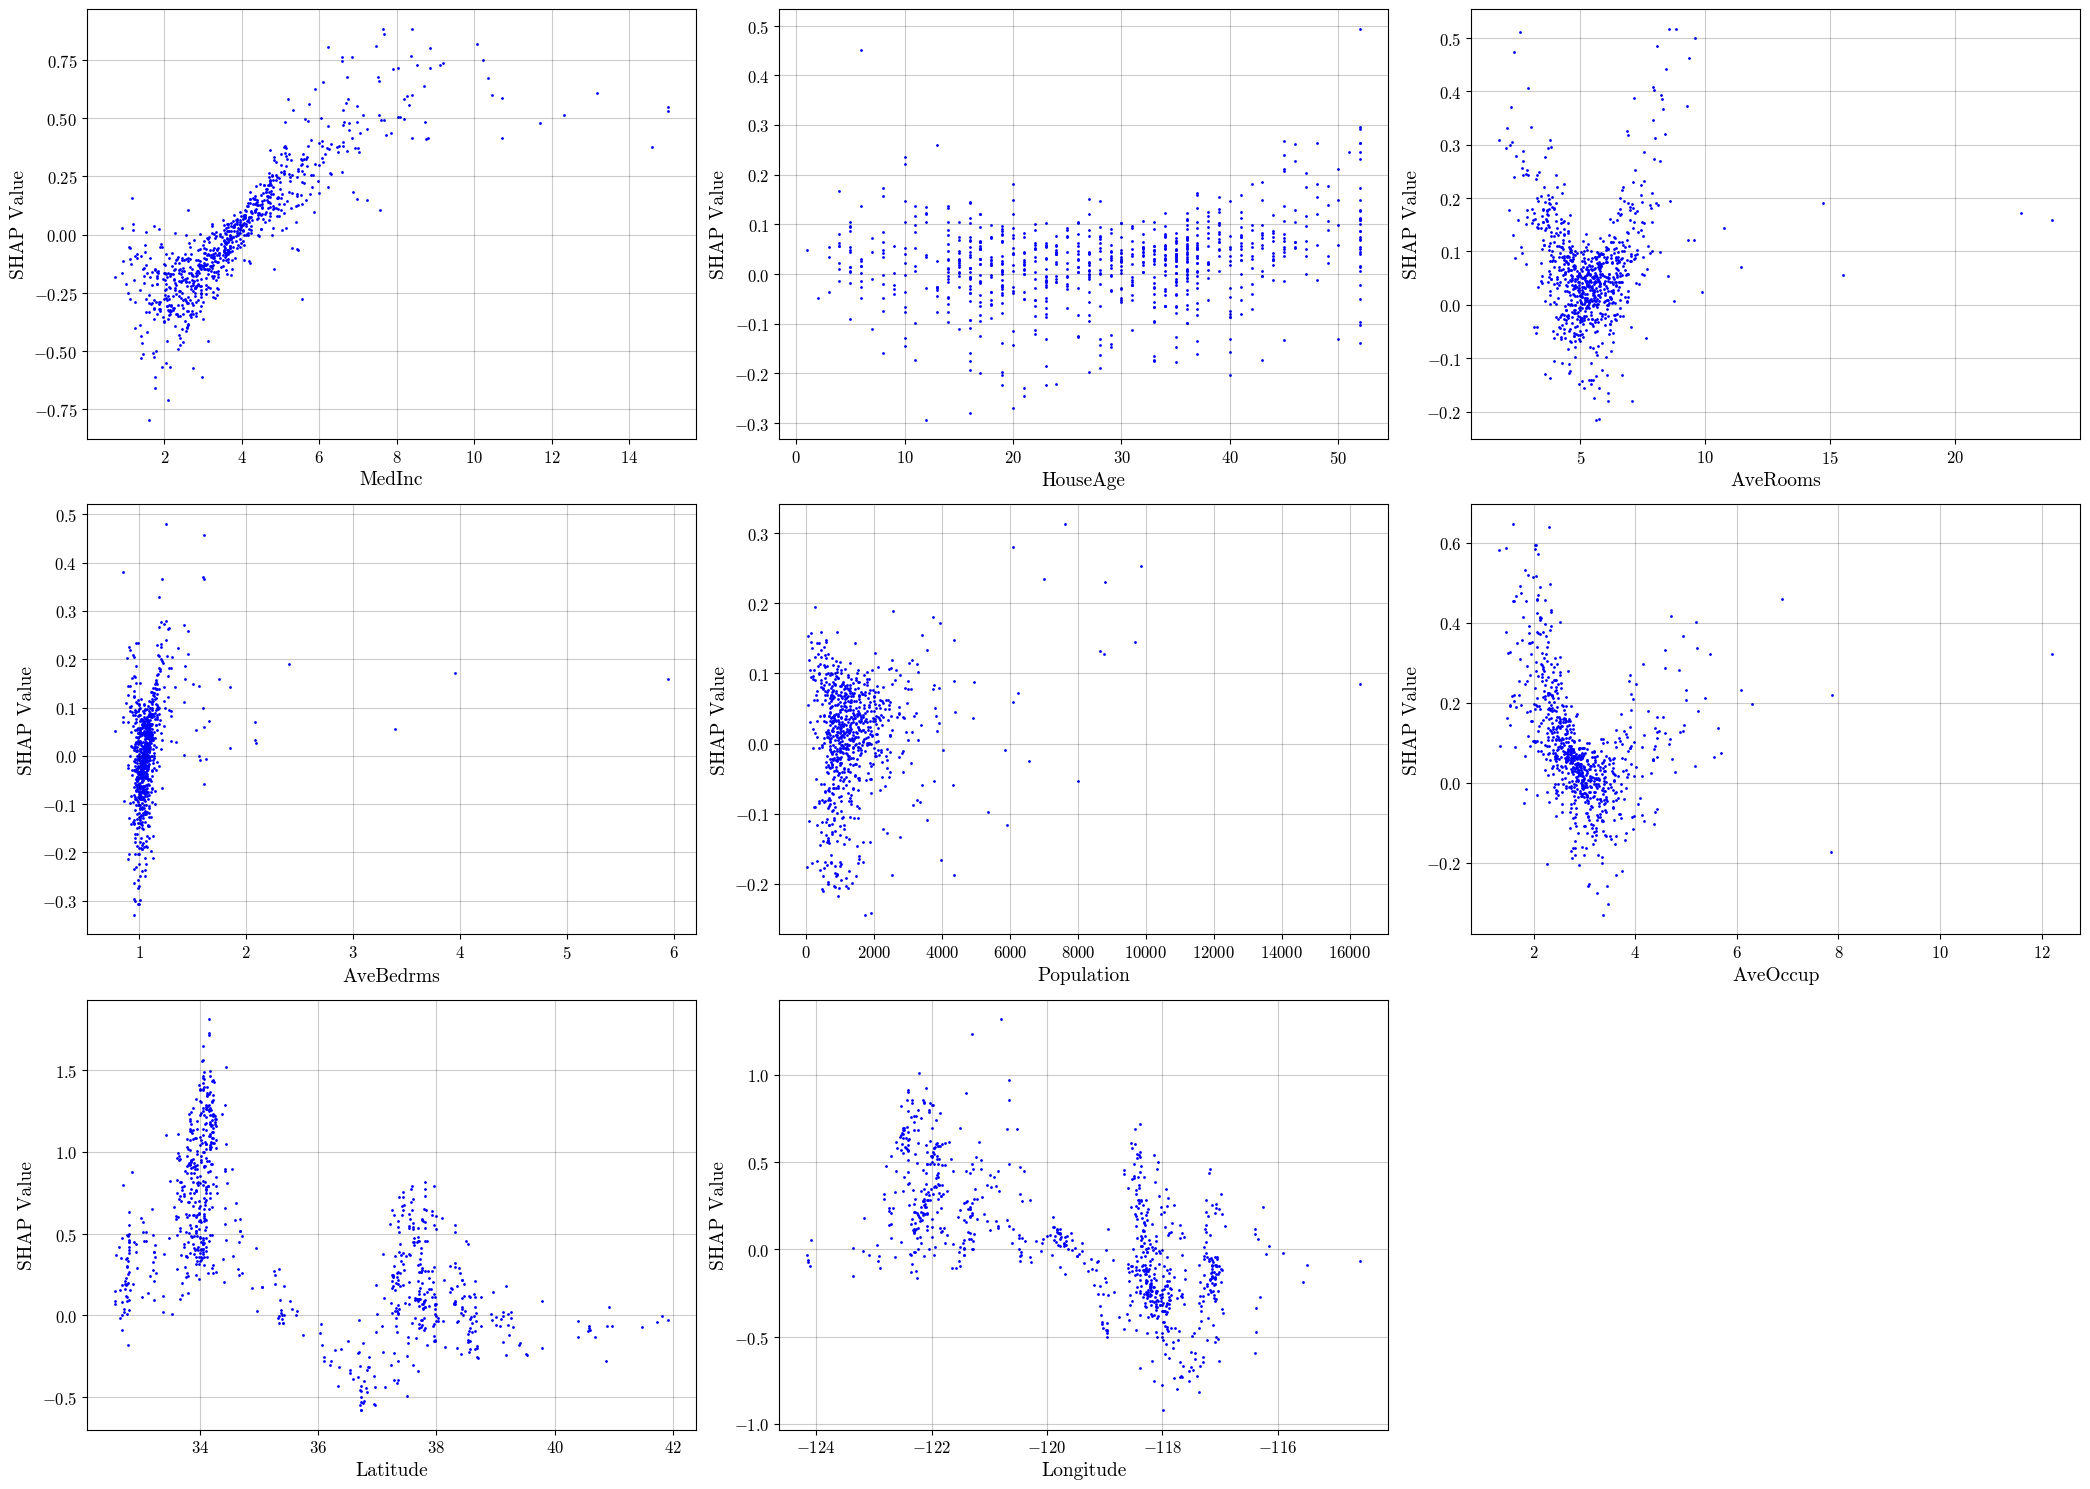

In [12]:
features = [0, 1, 2, 3, 4, 5, 6, 7,]

display.dependence_plot(
    features
)

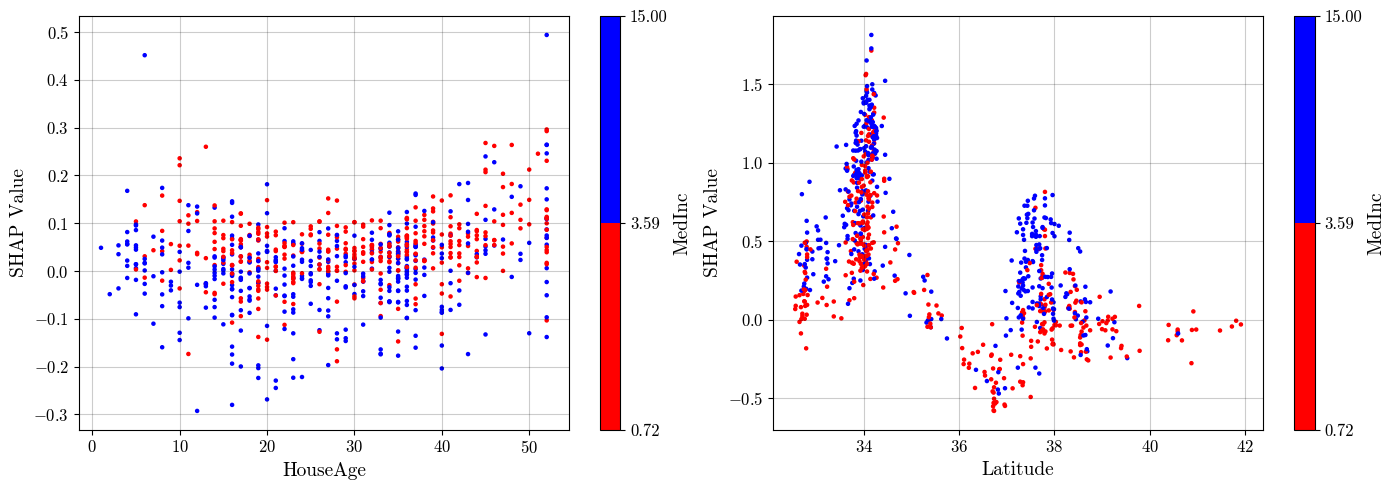

In [13]:
feature_pairs = [
    (1, 0), 
    (6, 0),
]
display.dependence_plot(
    feature_pairs
)


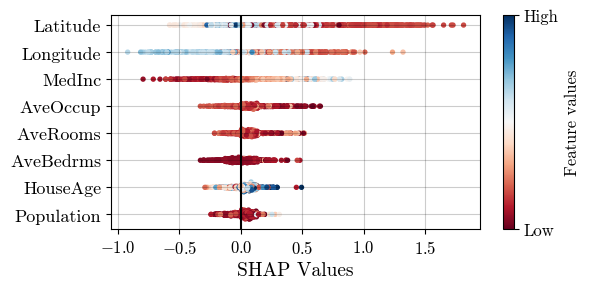

In [14]:
display.summary_plot()